In [2]:
import pandas as pd

# Load your dataset (replace 'sales_data.csv' with your actual file path)
sales_data = pd.read_excel('Sales_cleaned.xlsx', parse_dates=['Date'])


In [3]:
import pandas as pd

# Assuming sales_data is already defined
# Convert 'Date' to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Calculate total revenue
sales_data['Revenue'] = sales_data['Qty'] * sales_data['Rate']
total_revenue = sales_data['Revenue'].sum()

# Monthly Sales Statistics
sales_data['Month'] = sales_data['Date'].dt.to_period('M')
monthly_sales = sales_data.groupby('Month')['Revenue'].sum()
average_monthly_sales = monthly_sales.mean()
median_monthly_sales = monthly_sales.median()
sales_range = (monthly_sales.min(), monthly_sales.max())
std_deviation = monthly_sales.std()

# Display results
print("Total Sales Revenue: ₹", total_revenue)
print("Average Monthly Sales: ₹", average_monthly_sales)
print("Median Monthly Sales: ₹", median_monthly_sales)
print("Sales Range: ₹", sales_range)
print("Standard Deviation: ₹", std_deviation)


Total Sales Revenue: ₹ 11811647.0
Average Monthly Sales: ₹ 244531.66666666666
Median Monthly Sales: ₹ 112852.5
Sales Range: ₹ (10795.0, 1044029.0)
Standard Deviation: ₹ 271420.4335585319


In [4]:
# Group by 'Item Name' for product category analysis
product_sales = sales_data.groupby('Item Name').agg(
    Total_Units_Sold=('Qty', 'sum'),
    Total_Revenue=('Revenue', 'sum')
)
product_sales['Average_Price_Per_Unit'] = product_sales['Total_Revenue'] / product_sales['Total_Units_Sold']

print(product_sales)


                                       Total_Units_Sold  Total_Revenue  \
Item Name                                                                
"1/2"" DUMMY"                                       2.0          245.0   
"PRESSURE  GAUGE   2 1/2"" 10KG"                    2.0         1550.0   
"PRESSURE  GAUGE   2 1/2""210KG"                    1.0          750.0   
0.16 Lit Accumulator Olier                          7.0        40000.0   
0.2 Mm Generator Shim                               4.0          360.0   
...                                                 ...            ...   
Yaw Unit Suitable For NEPC 225 KW WTG               2.0        39000.0   
Yoke Hydro Spring Washer                           32.0         8000.0   
ZENTA COUPLING WASHER 750KW NEG MICON              20.0         5000.0   
ZERO COPPER                                         2.0         1950.0   
ZINK SPRAY                                          1.0          320.0   

                                     

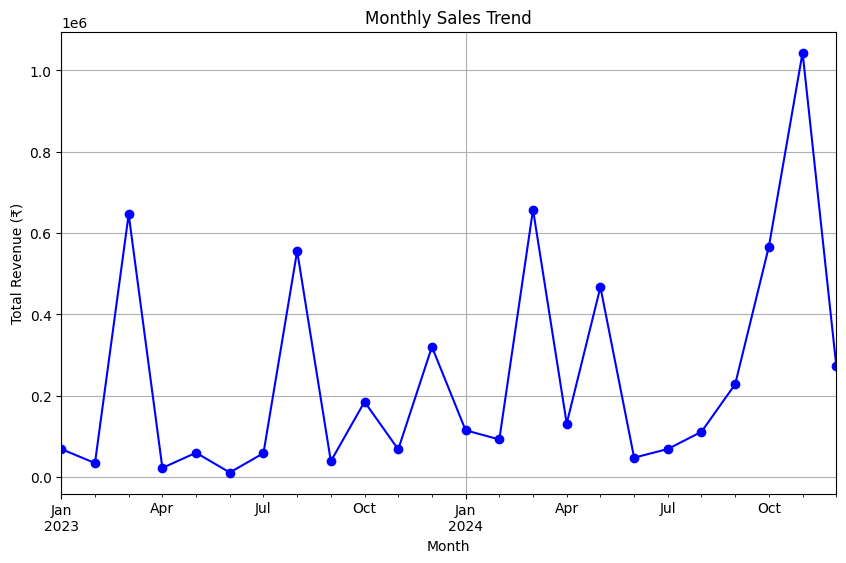

In [5]:
import matplotlib.pyplot as plt

# Plotting monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (₹)')
plt.grid(True)
plt.show()


C:\Users\Dhina\AppData\Local\Temp\ipykernel_11840\454302054.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


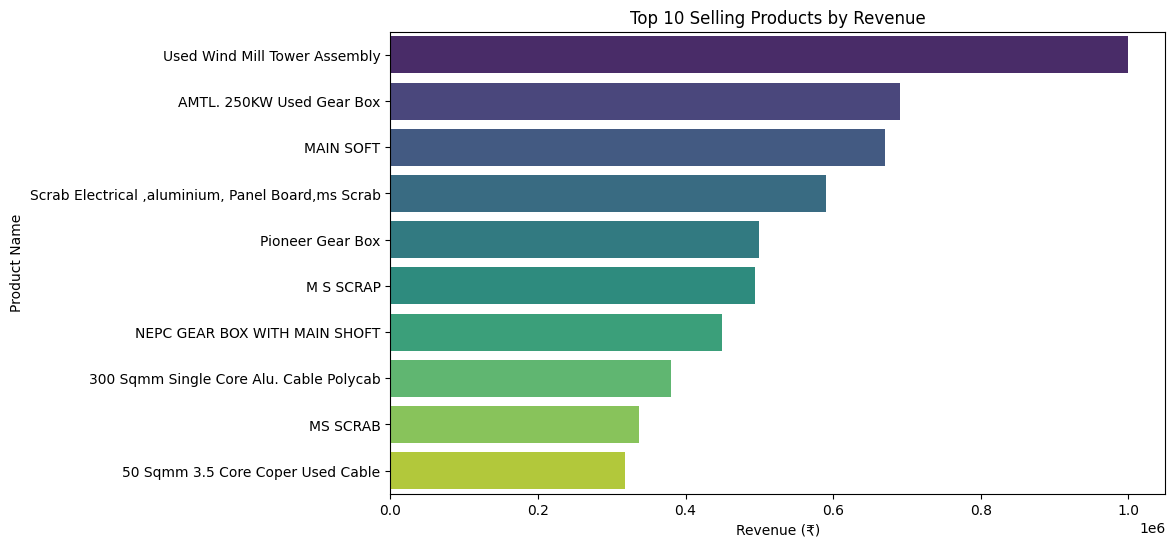

In [6]:
import seaborn as sns

# Sum revenue by item and sort to get top products
top_products = sales_data.groupby('Item Name')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot Top Products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Revenue')
plt.xlabel('Revenue (₹)')
plt.ylabel('Product Name')
plt.show()


Total Sales Revenue: ₹ 11811647.0
Average Monthly Sales (June to September): ₹ 139823.0
Median Monthly Sales (June to September): ₹ 63488.5
Sales Range (June to September): ₹ (10795.0, 555789.0)
Standard Deviation (June to September): ₹ 180802.05780276476


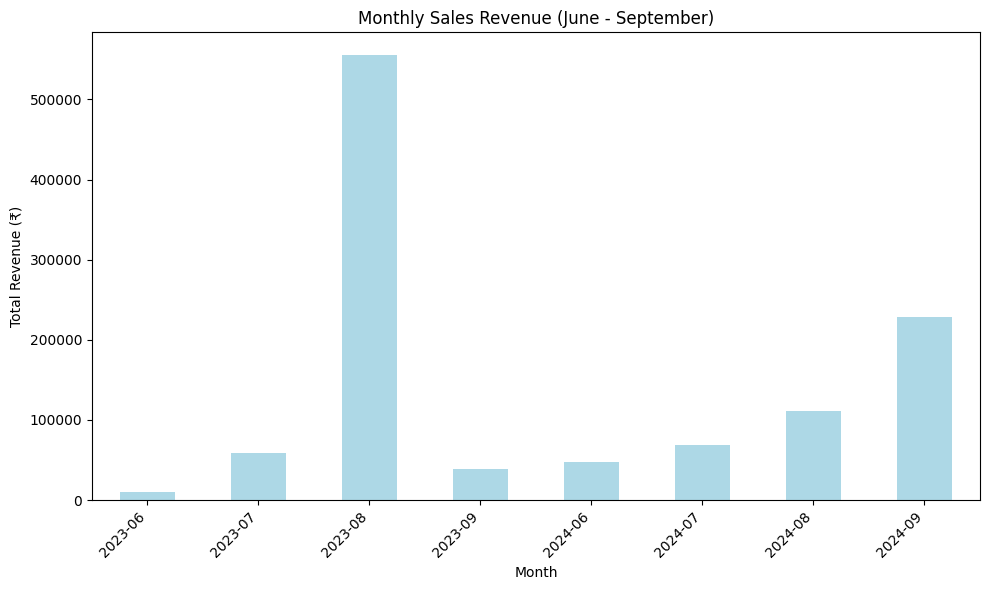

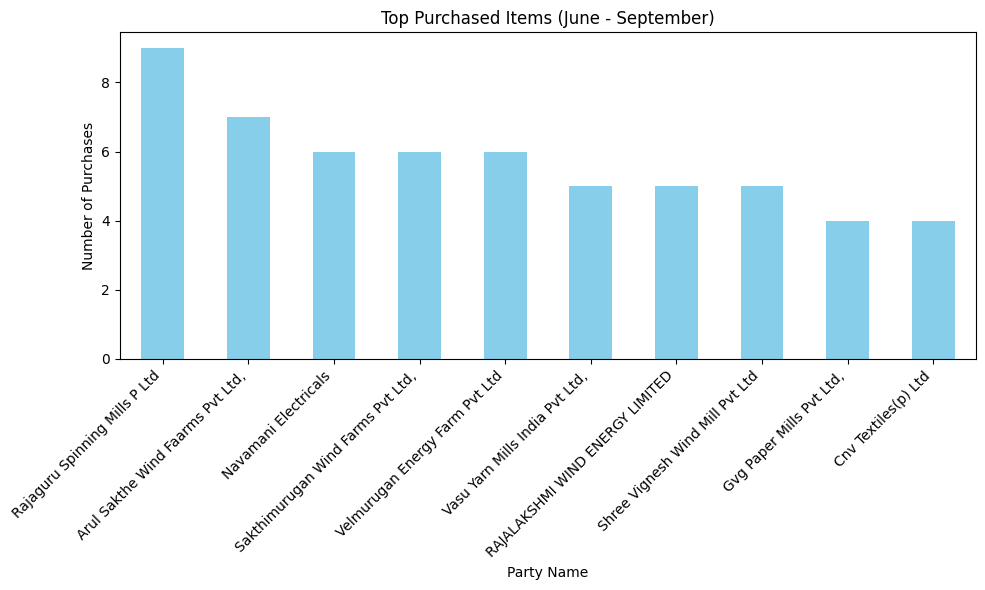

In [7]:


# Convert 'Date' to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Calculate total revenue
sales_data['Revenue'] = sales_data['Qty'] * sales_data['Rate']
total_revenue = sales_data['Revenue'].sum()

# Filter sales data for June, July, August, and September
sales_data['Month'] = sales_data['Date'].dt.month
filtered_data = sales_data[sales_data['Month'].isin([6, 7, 8, 9])]

# Monthly Sales Statistics (for June to September)
monthly_sales = filtered_data.groupby(filtered_data['Date'].dt.to_period('M'))['Revenue'].sum()
average_monthly_sales = monthly_sales.mean()
median_monthly_sales = monthly_sales.median()
sales_range = (monthly_sales.min(), monthly_sales.max())
std_deviation = monthly_sales.std()

# Display results
print("Total Sales Revenue: ₹", total_revenue)
print("Average Monthly Sales (June to September): ₹", average_monthly_sales)
print("Median Monthly Sales (June to September): ₹", median_monthly_sales)
print("Sales Range (June to September): ₹", sales_range)
print("Standard Deviation (June to September): ₹", std_deviation)

# Plotting monthly sales for June to September
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='lightblue')
plt.title('Monthly Sales Revenue (June - September)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top Purchased Items in June, July, August, and September
top_items = filtered_data['Party Name'].value_counts().head(10)  # Replace 'Part Name' with your column name
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top Purchased Items (June - September)')
plt.xlabel('Party Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


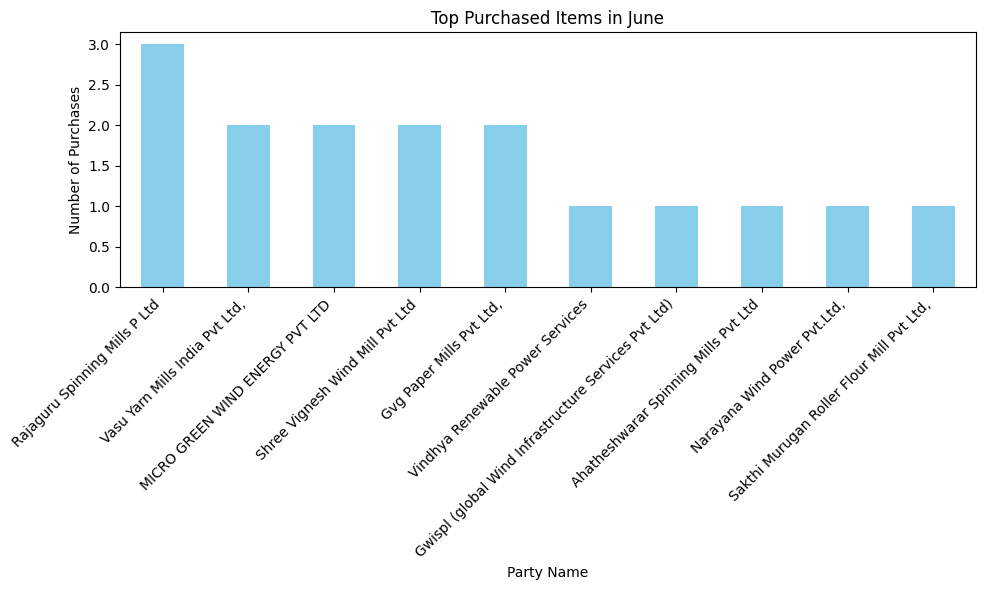

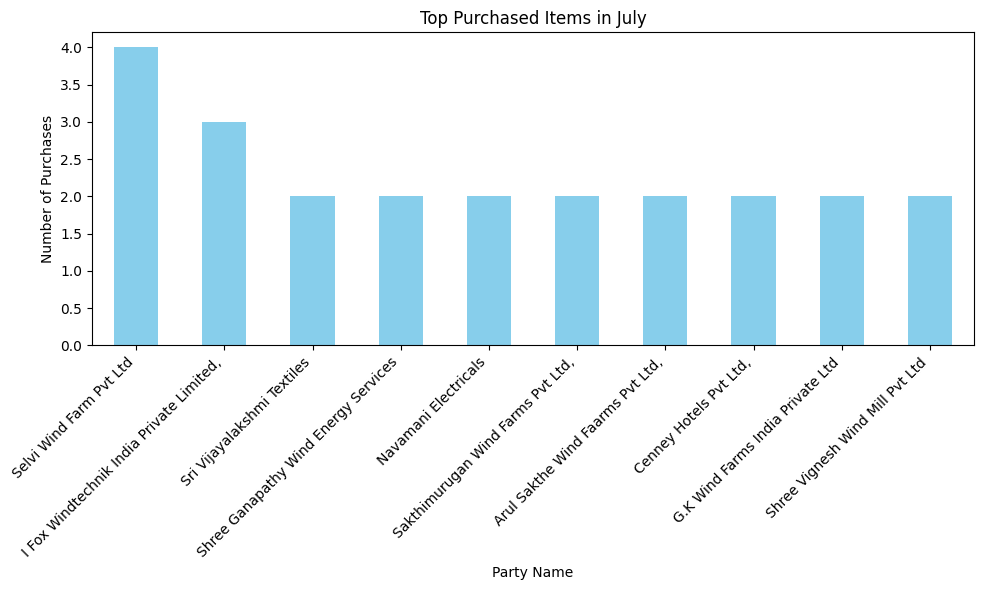

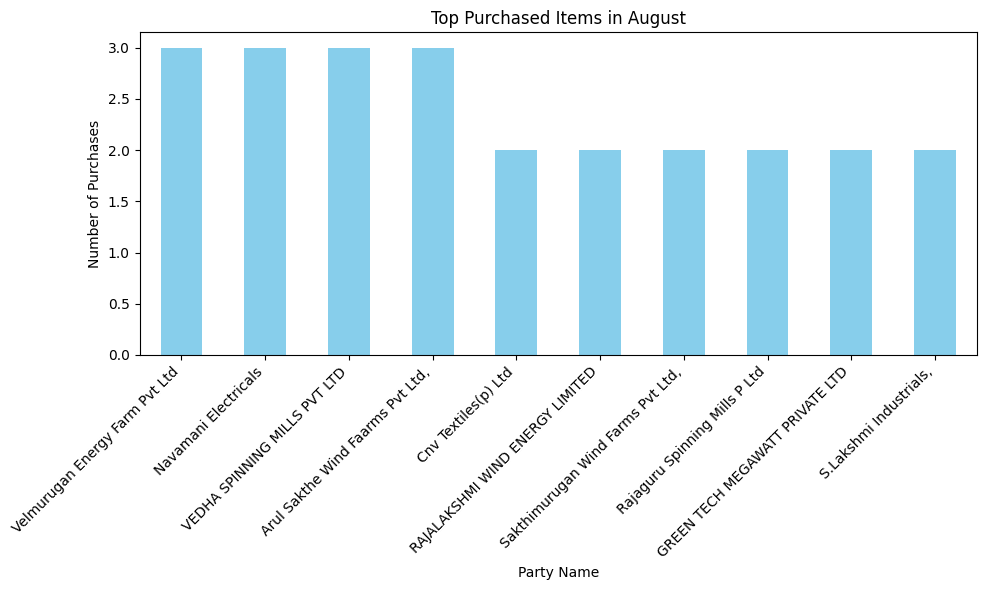

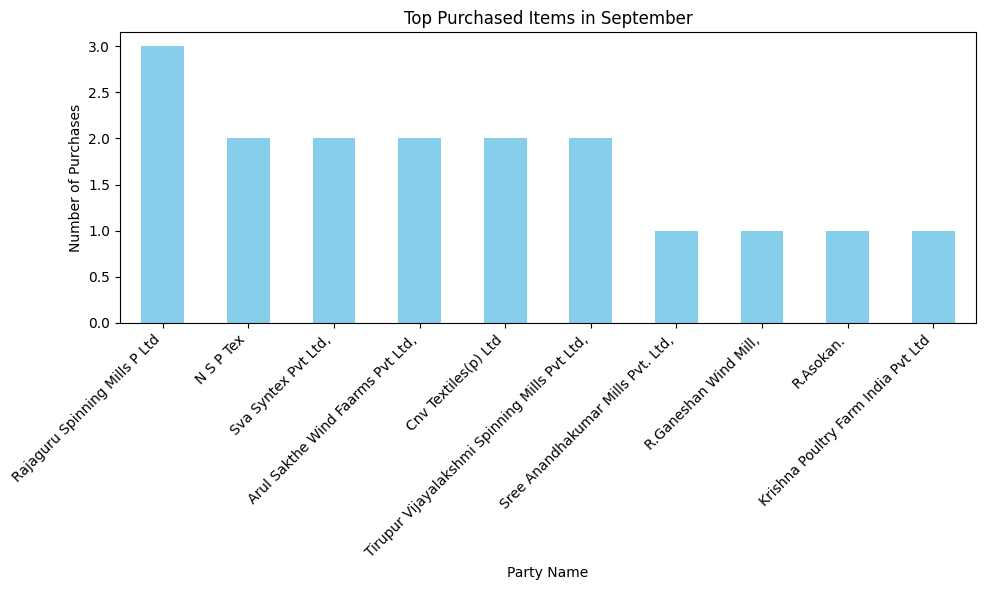

In [8]:
top_items_per_month = filtered_data.groupby([filtered_data['Date'].dt.month, 'Party Name']).size().unstack(fill_value=0)

# Plotting Top Items for each month
months = ['June', 'July', 'August', 'September']
for month in range(6, 10):
    plt.figure(figsize=(10, 6))
    top_items_in_month = top_items_per_month.loc[month].sort_values(ascending=False).head(10)  # Top 10 items for the month
    top_items_in_month.plot(kind='bar', color='skyblue')
    plt.title(f'Top Purchased Items in {months[month - 6]}')
    plt.xlabel('Party Name')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

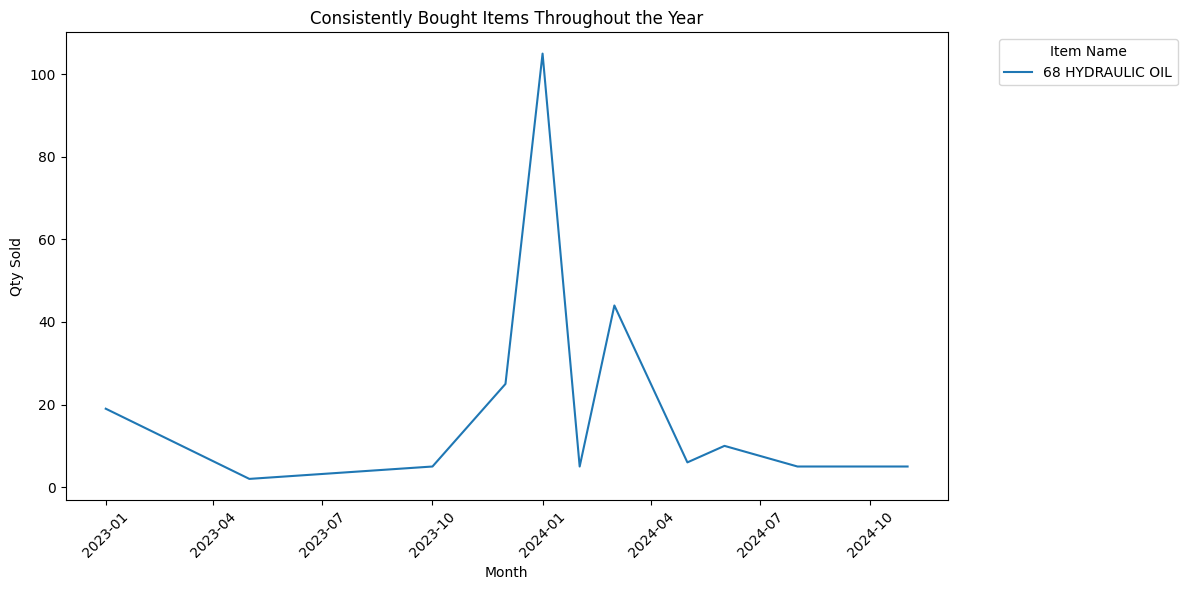

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'data' with columns: 'Date', 'Part Name', and 'Quantity'
# Parse the date column
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.to_period('M')  # Extract month for monthly grouping

# Group by 'Part Name' and 'Month' and aggregate the sum of 'Quantity' for each part each month
monthly_sales = sales_data.groupby(['Item Name', 'Month'])['Qty'].sum().reset_index()

# Identify items that are consistently bought each month
# You can adjust threshold based on your criteria for "consistency" (e.g., every month or most months)
consistently_bought_items = monthly_sales['Item Name'].value_counts()[lambda x: x >= 12].index  # e.g., 12 months for yearly consistency

# Filter data for consistent items
consistent_data = monthly_sales[monthly_sales['Item Name'].isin(consistently_bought_items)]

# Plotting
plt.figure(figsize=(12, 6))
for part in consistently_bought_items:
    part_data = consistent_data[consistent_data['Item Name'] == part]
    plt.plot(part_data['Month'].dt.to_timestamp(), part_data['Qty'], label=part)

plt.xlabel('Month')
plt.ylabel('Qty Sold')
plt.title('Consistently Bought Items Throughout the Year')
plt.legend(title="Item Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


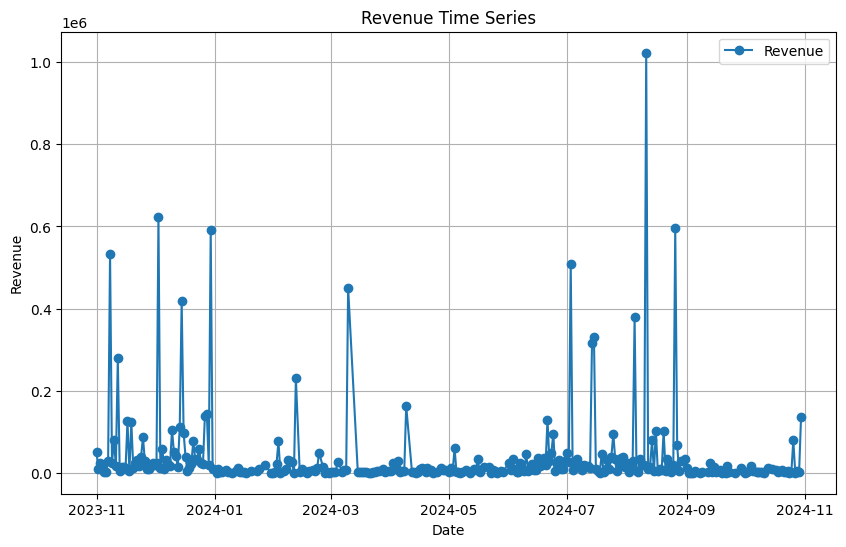

Running Auto ARIMA...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=8059.433, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=8053.049, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=8052.298, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=8051.462, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8089.276, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=8054.977, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=8053.453, Time=0.16 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=8053.288, Time=0.20 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=8052.398, Time=0.08 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=8055.270, Time=0.43 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=8049.396, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=8051.378, Time=0.11 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=8051.238, Time=0.17 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=8050.448, Time=0.09 s

C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

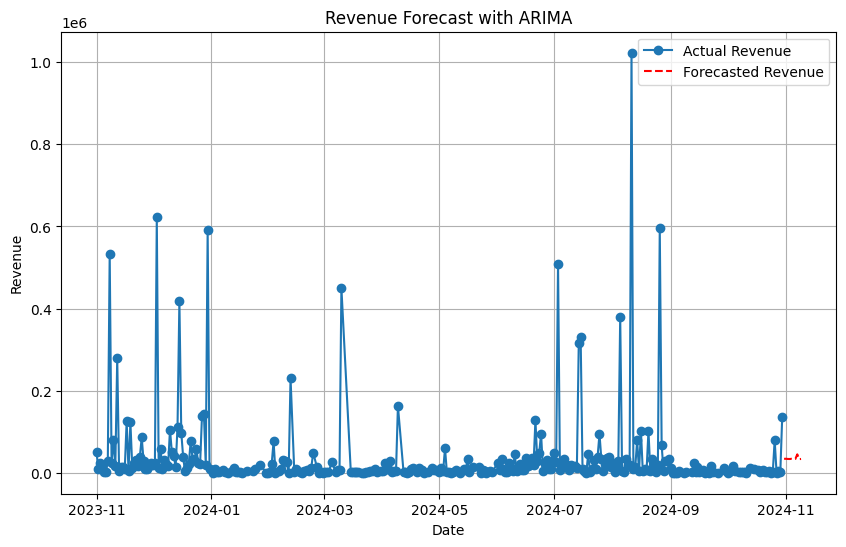

          Date  Forecasted Revenue
310 2024-10-31        33825.771770
311 2024-11-01        34036.591180
312 2024-11-02        33524.088930
313 2024-11-03        33436.868812
314 2024-11-04        33907.748929
315 2024-11-05        33323.993914
316 2024-11-06        33660.007672
317 2024-11-07        44752.453205
318 2024-11-08        33094.383434
319 2024-11-09        33590.089562


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load and Prepare the Data
# Replace 'Sales_cleaned.xlsx' with your actual file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Ensure 'Date' is in datetime format (adjusting for day-first format in case of European date format)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Check for any rows with invalid date values
if df['Date'].isna().sum() > 0:
    print("There are invalid date entries. Here are the rows with invalid dates:")
    print(df[df['Date'].isna()])

# Step 2: Add Revenue Column (Revenue = Qty * Rate)
df['Revenue'] = df['Qty'] * df['Rate']

# Step 3: Aggregate Revenue by Date (Daily or Monthly)
# Grouping data by date (daily or monthly)
time_series_data = df.groupby('Date')['Revenue'].sum()

# Step 4: Plot the Revenue Time Series
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Revenue", marker='o')
plt.title("Revenue Time Series")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid()
plt.show()

# Step 5: Auto ARIMA Model (Adjusting for Smaller Data)
print("Running Auto ARIMA...")

# Set seasonal frequency 'm' based on data resolution
# If daily data: m=7 (weekly); If monthly data: m=12
seasonal_frequency = 12  # Adjust as per your dataset resolution

try:
    auto_model = auto_arima(time_series_data,
                            seasonal=True,      # Test with seasonality
                            m=seasonal_frequency, 
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True,
                            stepwise=True)
except ValueError as e:
    print(f"Seasonal ARIMA failed: {e}. Falling back to non-seasonal ARIMA.")
    auto_model = auto_arima(time_series_data,
                            seasonal=False,     # Fallback to non-seasonal
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True,
                            stepwise=True)

# Print Auto ARIMA Summary
print("Auto ARIMA Summary:")
print(auto_model.summary())

# Step 6: Fit Final ARIMA Model
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

print(f"Best ARIMA order: {best_order}, Seasonal order: {best_seasonal_order}")

model = ARIMA(time_series_data, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

# Step 7: Forecast Future Revenue
forecast_steps = 10  # Forecast 10 periods into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Step 8: Plot Actual and Forecasted Revenue
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Actual Revenue", marker='o')
forecast_dates = pd.date_range(time_series_data.index[-1] + pd.Timedelta(days=1),
                               periods=forecast_steps, freq="D")
plt.plot(forecast_dates, forecast, label="Forecasted Revenue", linestyle="--", color='red')
plt.title("Revenue Forecast with ARIMA")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid()
plt.show()

# Step 9: Display Forecast Results
forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted Revenue": forecast})
print(forecast_df)


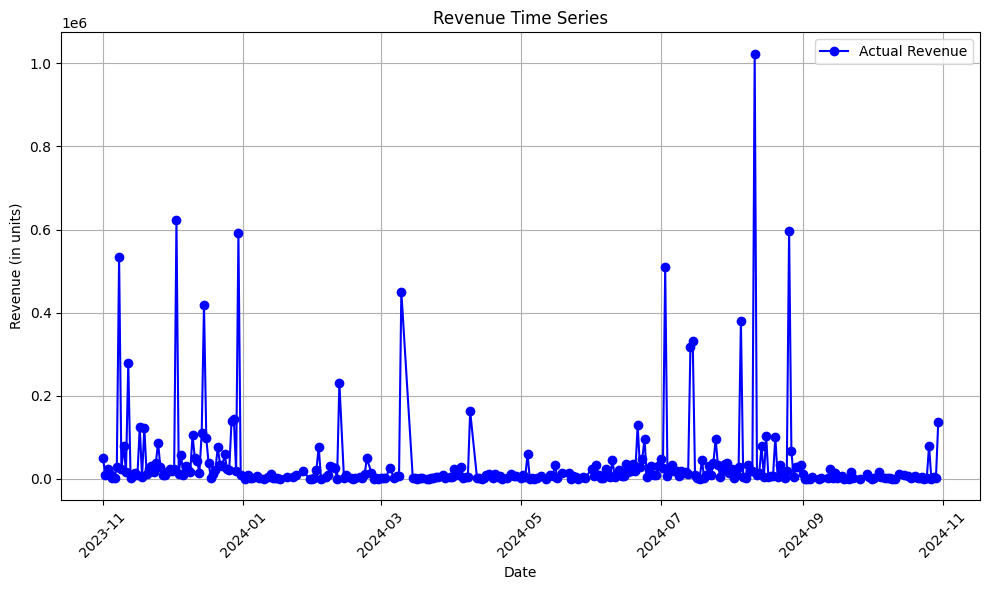

Running Auto ARIMA...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=8059.433, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=8053.049, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=8052.298, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=8051.462, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8089.276, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=8054.977, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=8053.453, Time=0.25 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=8053.288, Time=0.21 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=8052.398, Time=0.08 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=8055.270, Time=0.46 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=8049.396, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=8051.378, Time=0.10 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=8051.238, Time=0.16 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=8050.448, Time=0.06 s

C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

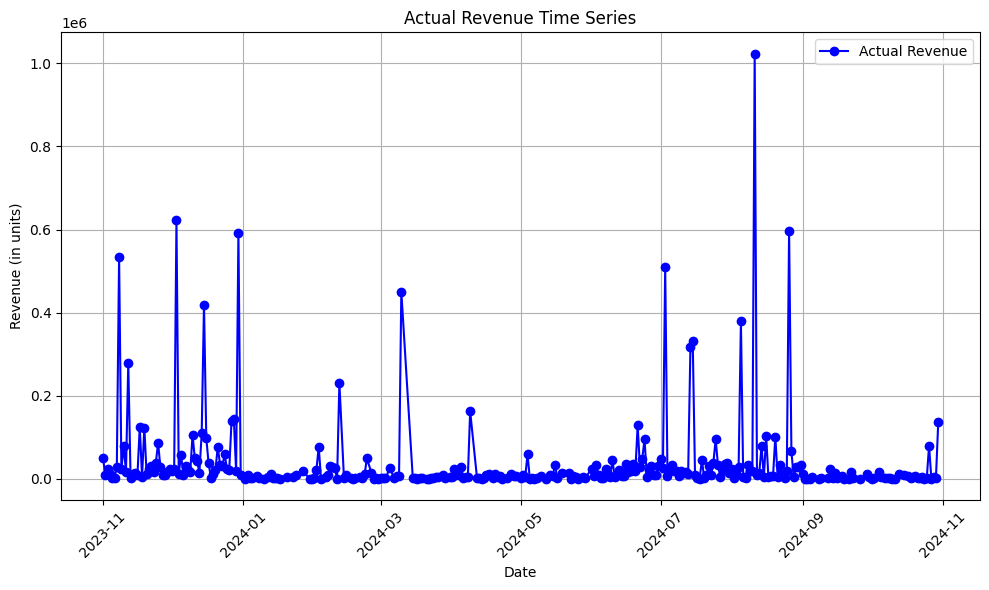

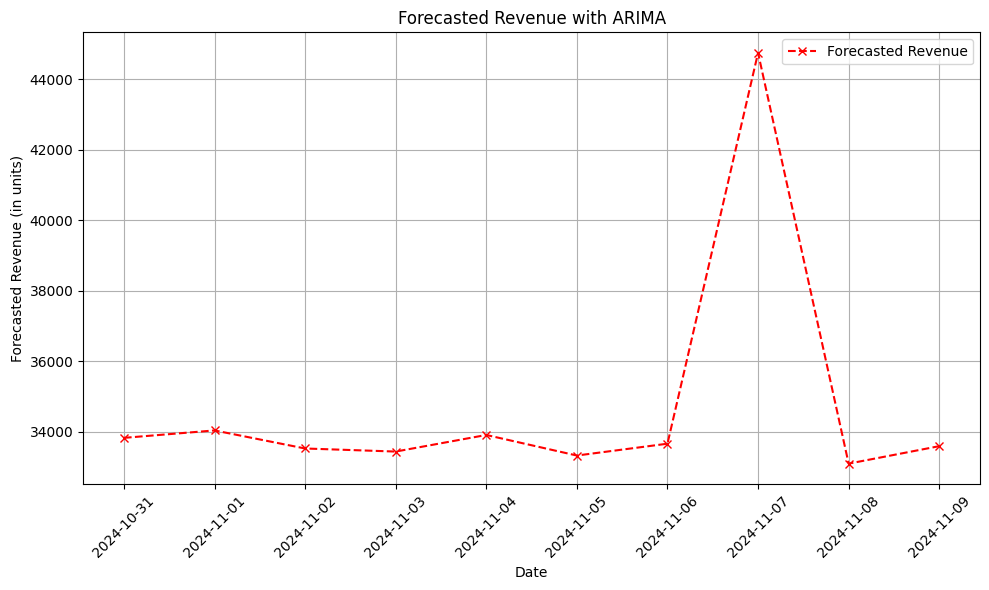

          Date  Forecasted Revenue
310 2024-10-31        33825.771770
311 2024-11-01        34036.591180
312 2024-11-02        33524.088930
313 2024-11-03        33436.868812
314 2024-11-04        33907.748929
315 2024-11-05        33323.993914
316 2024-11-06        33660.007672
317 2024-11-07        44752.453205
318 2024-11-08        33094.383434
319 2024-11-09        33590.089562


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load and Prepare the Data
# Replace 'Sales_cleaned.xlsx' with your actual file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Ensure 'Date' is in datetime format (adjusting for day-first format in case of European date format)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Check for any rows with invalid date values
if df['Date'].isna().sum() > 0:
    print("There are invalid date entries. Here are the rows with invalid dates:")
    print(df[df['Date'].isna()])

# Step 2: Add Revenue Column (Revenue = Qty * Rate)
df['Revenue'] = df['Qty'] * df['Rate']

# Step 3: Aggregate Revenue by Date (Daily or Monthly)
# Grouping data by date (daily or monthly)
time_series_data = df.groupby('Date')['Revenue'].sum()

# Step 4: Plot the Revenue Time Series
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Actual Revenue", marker='o', color='blue')
plt.title("Revenue Time Series")
plt.xlabel("Date")
plt.ylabel("Revenue (in units)")  # Adding units for revenue
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

# Step 5: Auto ARIMA Model (Adjusting for Smaller Data)
print("Running Auto ARIMA...")

# Set seasonal frequency 'm' based on data resolution
# If daily data: m=7 (weekly); If monthly data: m=12
seasonal_frequency = 12  # Adjust as per your dataset resolution

try:
    auto_model = auto_arima(time_series_data,
                            seasonal=True,      # Test with seasonality
                            m=seasonal_frequency, 
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True,
                            stepwise=True)
except ValueError as e:
    print(f"Seasonal ARIMA failed: {e}. Falling back to non-seasonal ARIMA.")
    auto_model = auto_arima(time_series_data,
                            seasonal=False,     # Fallback to non-seasonal
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True,
                            stepwise=True)

# Print Auto ARIMA Summary
print("Auto ARIMA Summary:")
print(auto_model.summary())

# Step 6: Fit Final ARIMA Model
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

print(f"Best ARIMA order: {best_order}, Seasonal order: {best_seasonal_order}")

model = ARIMA(time_series_data, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

# Step 7: Forecast Future Revenue
forecast_steps = 10  # Forecast 10 periods into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Step 8: Plot Actual Revenue
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Actual Revenue", marker='o', color='blue')
plt.title("Actual Revenue Time Series")
plt.xlabel("Date")
plt.ylabel("Revenue (in units)")  # Adding units for revenue
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

# Step 9: Plot Forecasted Revenue
forecast_dates = pd.date_range(time_series_data.index[-1] + pd.Timedelta(days=1),
                               periods=forecast_steps, freq="D")

plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecast, label="Forecasted Revenue", linestyle="--", color='red', marker='x')
plt.title("Forecasted Revenue with ARIMA")
plt.xlabel("Date")
plt.ylabel("Forecasted Revenue (in units)")  # Adding units for revenue
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

# Step 10: Display Forecast Results
forecast_df = pd.DataFrame({"Date": forecast_dates, "Forecasted Revenue": forecast})
print(forecast_df)

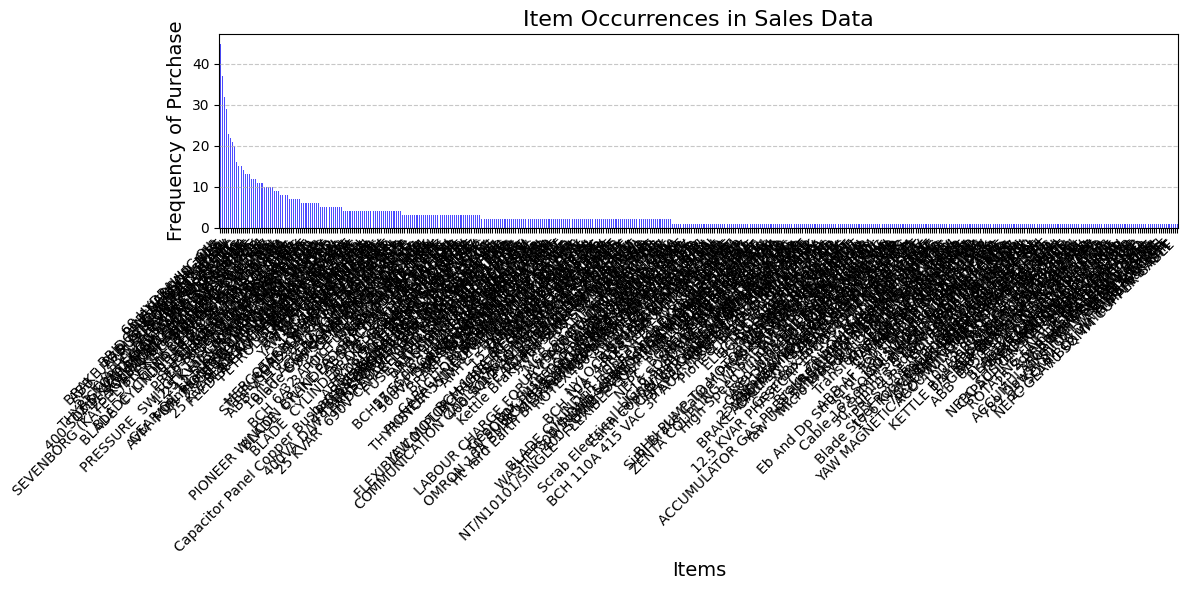

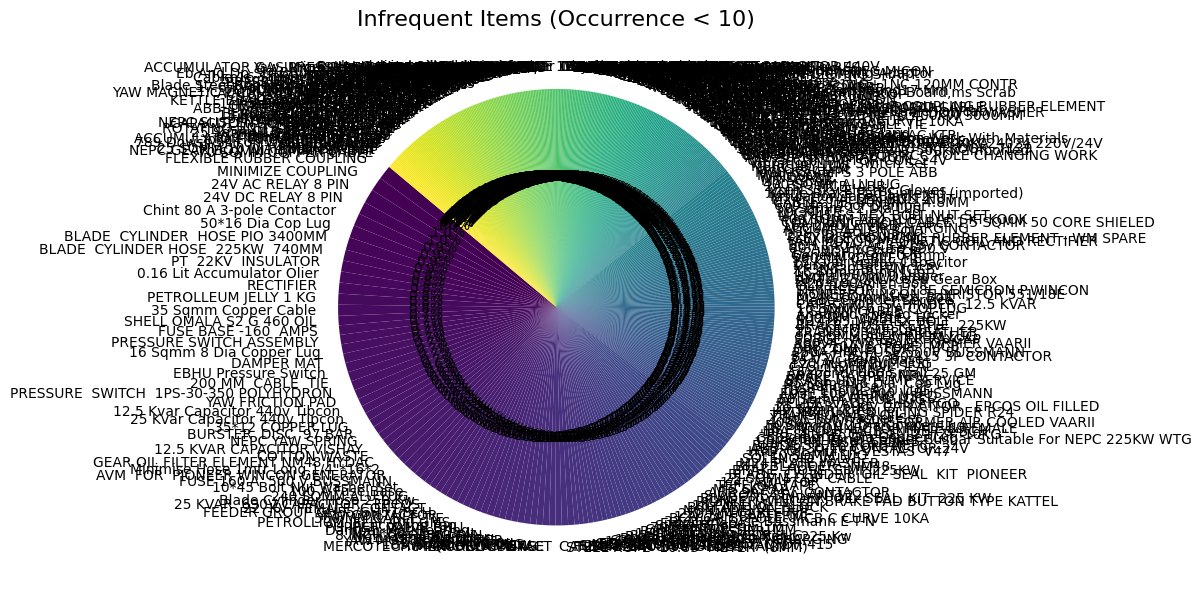

Insights:
- Total Items: 458
- Frequent Items (>= 10): 26
- Infrequent Items (< 10): 432


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Step 2: Count Item Occurrences
# Assuming 'Item' is the column name for the items in your dataset
item_counts = df['Item Name'].value_counts()

# Step 3: Visualize All Items with Occurrence Frequency
plt.figure(figsize=(12, 6))

# Plot bar chart for all items
item_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Item Occurrences in Sales Data", fontsize=16)
plt.xlabel("Items", fontsize=14)
plt.ylabel("Frequency of Purchase", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 4: Highlight Infrequent Items (low-frequency)
threshold = 10  # Adjust threshold to define infrequent items
infrequent_items = item_counts[item_counts < threshold]

plt.figure(figsize=(12, 6))

# Plot pie chart for infrequent items to show diversity
infrequent_items.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title(f"Infrequent Items (Occurrence < {threshold})", fontsize=16)
plt.ylabel("")  # Remove y-axis label for a cleaner pie chart
plt.tight_layout()
plt.show()

# Step 5: Insights Summary
print("Insights:")
print(f"- Total Items: {len(item_counts)}")
print(f"- Frequent Items (>= {threshold}): {len(item_counts[item_counts >= threshold])}")
print(f"- Infrequent Items (< {threshold}): {len(infrequent_items)}")


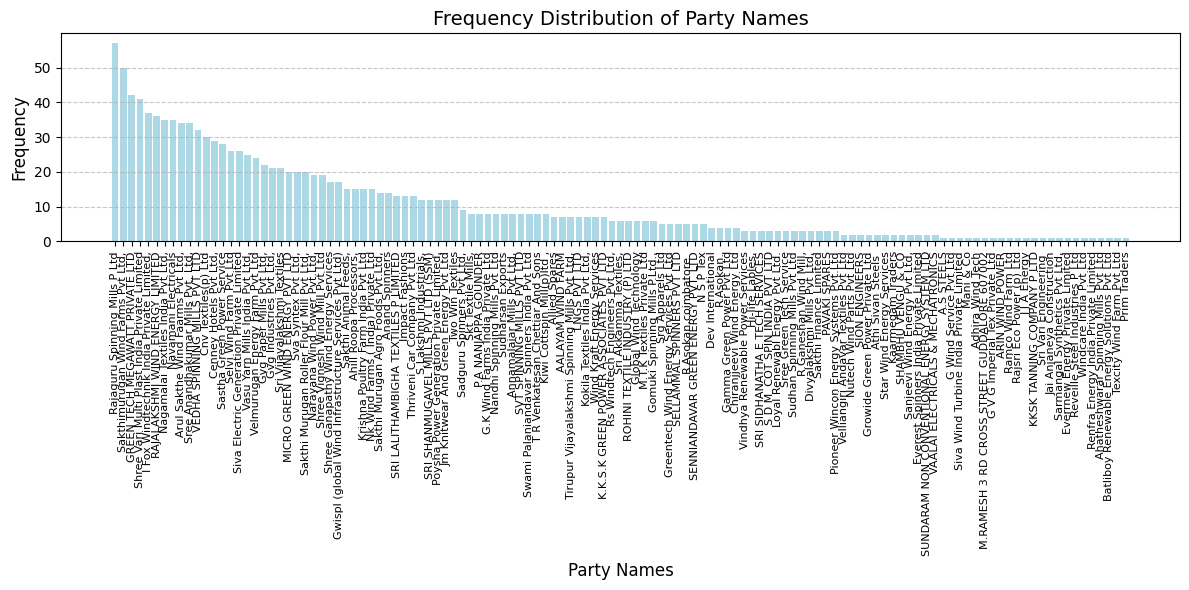

Total Party Names: 1309
Unique Party Names: 123
Percentage of Unique Party Names: 9.40%


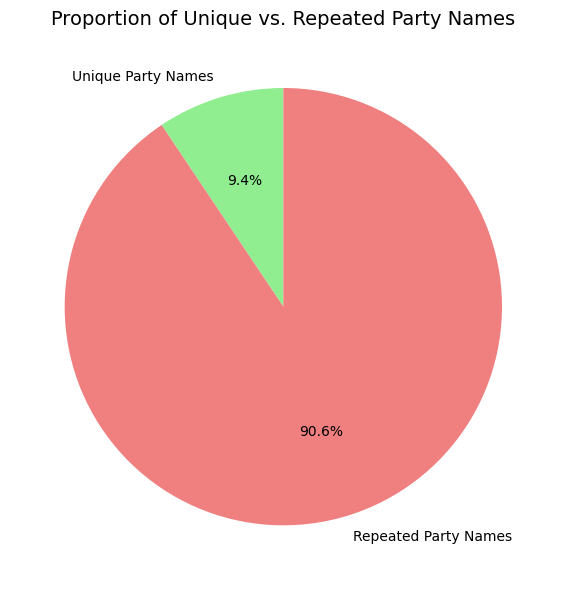

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your actual dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Step 2: Check Party Name Distribution
# Group by Party Name to calculate their frequency
party_name_frequency = df['Party Name'].value_counts()

# Step 3: Plot Frequency Distribution
plt.figure(figsize=(12, 6))
plt.bar(party_name_frequency.index, party_name_frequency.values, color='lightblue')
plt.title('Frequency Distribution of Party Names', fontsize=14)
plt.xlabel('Party Names', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 4: Highlight Uniqueness of Party Names
# Calculate the proportion of unique Party Names
total_parties = len(df['Party Name'])
unique_parties = df['Party Name'].nunique()
print(f"Total Party Names: {total_parties}")
print(f"Unique Party Names: {unique_parties}")
print(f"Percentage of Unique Party Names: {unique_parties / total_parties * 100:.2f}%")

# Step 5: Optional: Visualize Unique vs Non-Unique Party Names
unique_counts = pd.Series({
    'Unique Party Names': unique_parties,
    'Repeated Party Names': total_parties - unique_parties
})

plt.figure(figsize=(6, 6))
unique_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Proportion of Unique vs. Repeated Party Names', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your actual dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Step 2: Calculate Frequency of Party Names
party_name_frequency = df['Party Name'].value_counts()

# Step 3: Display Frequency Table
print("Frequency of Party Names:")
print(party_name_frequency)

# Step 4: Save Frequency Data (Optional)
# If you want to save the frequency data to a file for further use
party_name_frequency_df = party_name_frequency.reset_index()
party_name_frequency_df.columns = ['Party Name', 'Frequency']
party_name_frequency_df.to_csv("Party_Name_Frequency.csv", index=False)

print("\nFrequency data saved to 'Party_Name_Frequency.csv'.")


Frequency of Party Names:
Party Name
Rajaguru Spinning Mills P Ltd                   57
Sakthimurugan Wind Farms Pvt Ltd,               50
GREEN TECH MEGAWATT PRIVATE LTD                 42
Shree Vari Multi Plast India Private Limited    41
I Fox Windtechnik India Private Limited,        37
                                                ..
Renfra Energy India Private Limited              1
Ahatheshwarar Spinning Mills Pvt Ltd             1
Batliboy Renewable Energy Solutions Pvt Ltd      1
Texcity Wind Farm Pvt Ltd                        1
Prim Traders                                     1
Name: count, Length: 123, dtype: int64

Frequency data saved to 'Party_Name_Frequency.csv'.


In [35]:
import pandas as pd

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your actual dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Step 2: Calculate Frequency of Party Names
party_name_frequency = df['Party Name'].value_counts()

# Step 3: Classify Party Names into Groups
grouped_party_names = party_name_frequency.apply(lambda x: 'Frequent' if x > 5 else 'Infrequent')

# Display Grouped Classification
print("Classification of Party Names:")
print(grouped_party_names.value_counts())

# Save the grouped classification (Optional)
grouped_classification_df = pd.DataFrame({
    'Party Name': party_name_frequency.index,
    'Frequency': party_name_frequency.values,
    'Group': grouped_party_names.values
})
grouped_classification_df.to_csv("Party_Name_Classification.csv", index=False)

print("\nGrouped classification saved to 'Party_Name_Classification.csv'.")


Classification of Party Names:
count
Frequent      66
Infrequent    57
Name: count, dtype: int64

Grouped classification saved to 'Party_Name_Classification.csv'.


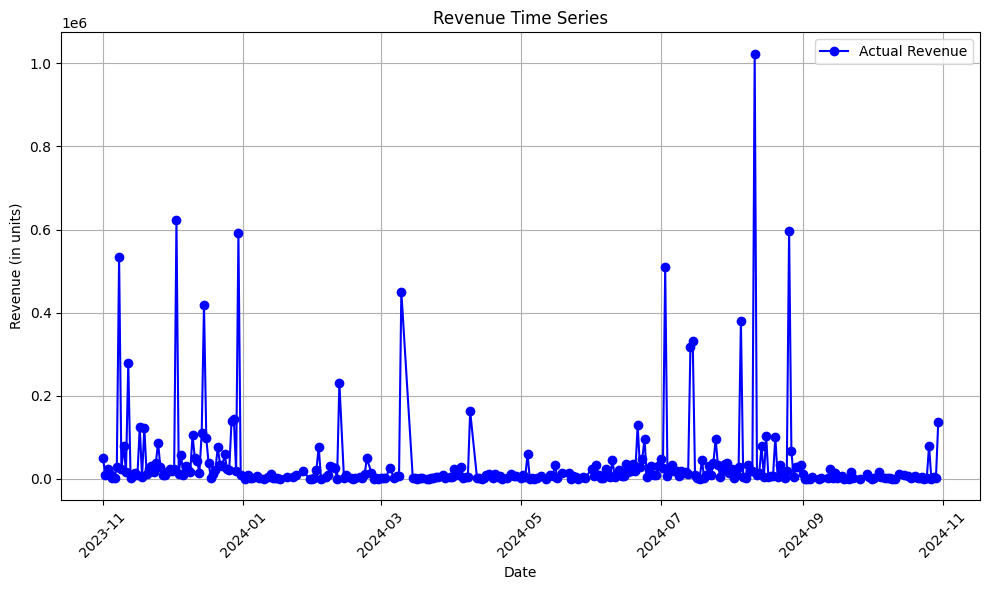

Running Auto ARIMA...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=8059.433, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=8053.049, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=8052.298, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=8051.462, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8089.276, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=8054.977, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=8053.453, Time=0.15 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=8053.288, Time=0.18 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=8052.398, Time=0.07 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=8055.270, Time=0.35 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=8049.396, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=8051.378, Time=0.08 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=8051.238, Time=0.15 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=8050.448, Time=0.07 s

C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

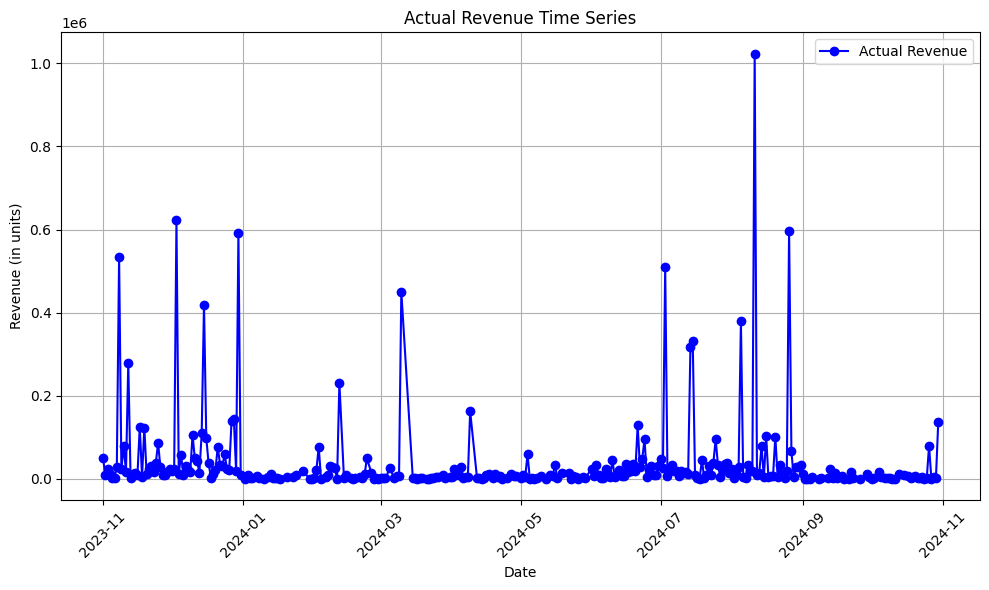

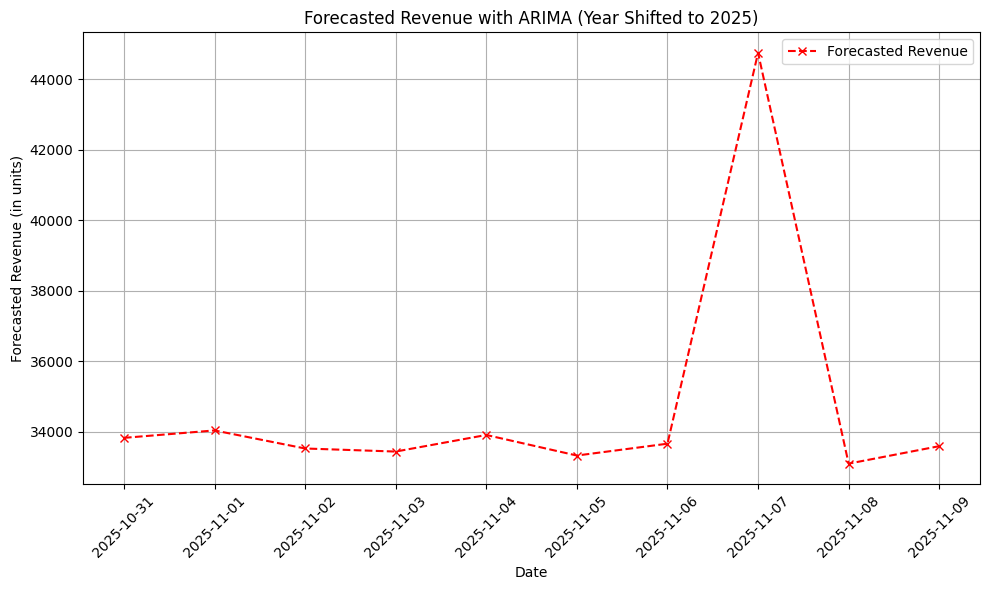

    Date (2025)  Forecasted Revenue
310  2025-10-31        33825.771770
311  2025-11-01        34036.591180
312  2025-11-02        33524.088930
313  2025-11-03        33436.868812
314  2025-11-04        33907.748929
315  2025-11-05        33323.993914
316  2025-11-06        33660.007672
317  2025-11-07        44752.453205
318  2025-11-08        33094.383434
319  2025-11-09        33590.089562


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load and Prepare the Data
# Replace 'Sales_cleaned.xlsx' with your actual file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Ensure 'Date' is in datetime format (adjusting for day-first format in case of European date format)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Check for any rows with invalid date values
if df['Date'].isna().sum() > 0:
    print("There are invalid date entries. Here are the rows with invalid dates:")
    print(df[df['Date'].isna()])

# Step 2: Add Revenue Column (Revenue = Qty * Rate)
df['Revenue'] = df['Qty'] * df['Rate']

# Step 3: Aggregate Revenue by Date (Daily or Monthly)
# Grouping data by date (daily or monthly)
time_series_data = df.groupby('Date')['Revenue'].sum()

# Step 4: Plot the Revenue Time Series
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Actual Revenue", marker='o', color='blue')
plt.title("Revenue Time Series")
plt.xlabel("Date")
plt.ylabel("Revenue (in units)")  # Adding units for revenue
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

# Step 5: Auto ARIMA Model (Adjusting for Smaller Data)
print("Running Auto ARIMA...")

# Set seasonal frequency 'm' based on data resolution
# If daily data: m=7 (weekly); If monthly data: m=12
seasonal_frequency = 12  # Adjust as per your dataset resolution

try:
    auto_model = auto_arima(time_series_data,
                            seasonal=True,      # Test with seasonality
                            m=seasonal_frequency, 
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True,
                            stepwise=True)
except ValueError as e:
    print(f"Seasonal ARIMA failed: {e}. Falling back to non-seasonal ARIMA.")
    auto_model = auto_arima(time_series_data,
                            seasonal=False,     # Fallback to non-seasonal
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True,
                            stepwise=True)

# Print Auto ARIMA Summary
print("Auto ARIMA Summary:")
print(auto_model.summary())

# Step 6: Fit Final ARIMA Model
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

print(f"Best ARIMA order: {best_order}, Seasonal order: {best_seasonal_order}")

model = ARIMA(time_series_data, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

# Step 7: Forecast Future Revenue
forecast_steps = 10  # Forecast 10 periods into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Step 8: Plot Actual Revenue
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Actual Revenue", marker='o', color='blue')
plt.title("Actual Revenue Time Series")
plt.xlabel("Date")
plt.ylabel("Revenue (in units)")  # Adding units for revenue
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

# Step 9: Adjust Forecast Dates for Year 2025
forecast_dates = pd.date_range(time_series_data.index[-1] + pd.Timedelta(days=1),
                               periods=forecast_steps, freq="D")

# Shift the forecast dates to 2025
forecast_dates_2025 = forecast_dates + pd.DateOffset(years=1)

# Plot Forecasted Revenue
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates_2025, forecast, label="Forecasted Revenue", linestyle="--", color='red', marker='x')
plt.title("Forecasted Revenue with ARIMA (Year Shifted to 2025)")
plt.xlabel("Date")
plt.ylabel("Forecasted Revenue (in units)")  # Adding units for revenue
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

# Step 10: Display Adjusted Forecast Results
forecast_df = pd.DataFrame({"Date (2025)": forecast_dates_2025, "Forecasted Revenue": forecast})
print(forecast_df)


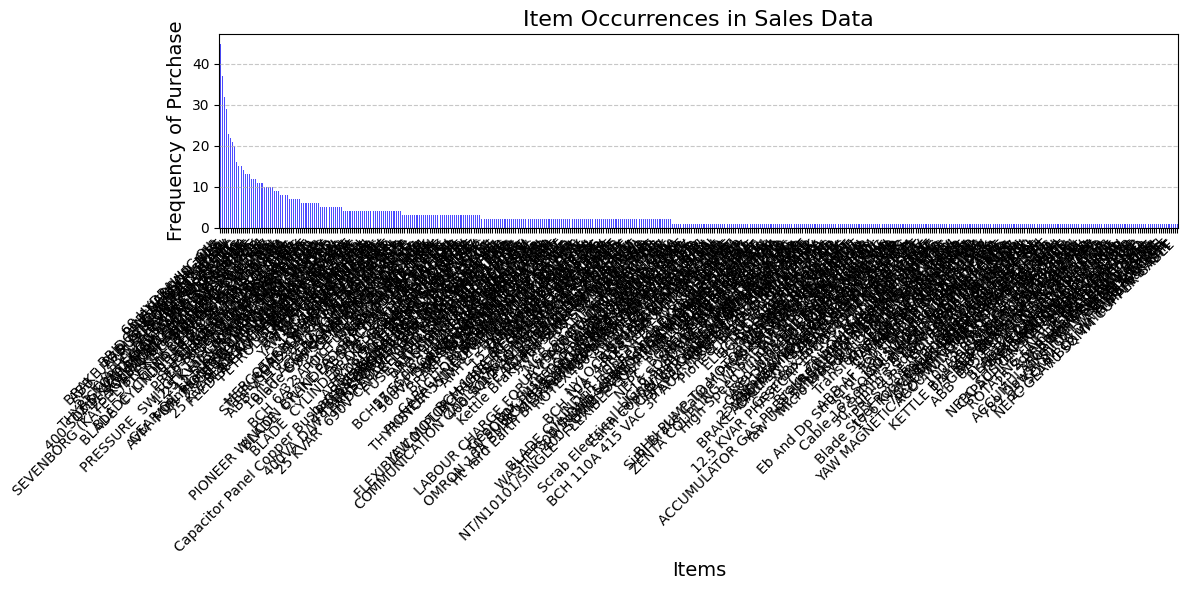

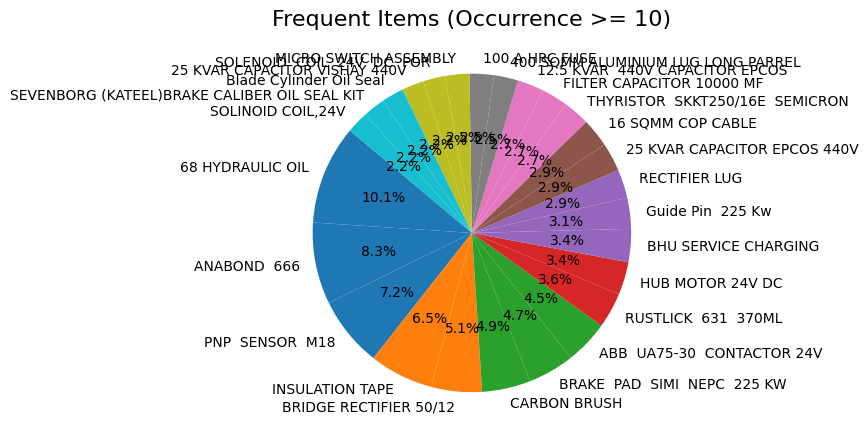

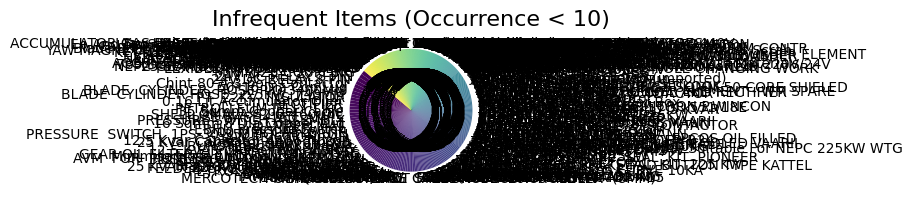

Insights:
- Total Items: 458
- Frequent Items (>= 10): 26
- Infrequent Items (< 10): 432


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Step 2: Count Item Occurrences
# Assuming 'Item Name' is the column name for the items in your dataset
item_counts = df['Item Name'].value_counts()

# Step 3: Visualize All Items with Occurrence Frequency
plt.figure(figsize=(12, 6))

# Plot bar chart for all items
item_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Item Occurrences in Sales Data", fontsize=16)
plt.xlabel("Items", fontsize=14)
plt.ylabel("Frequency of Purchase", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 4: Highlight Frequent Items (high-frequency)
threshold = 10  # Adjust threshold to define frequent items
frequent_items = item_counts[item_counts >= threshold]

plt.figure(figsize=(8, 8))

# Plot pie chart for frequent items to show their frequency distribution
frequent_items.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10')
plt.title(f"Frequent Items (Occurrence >= {threshold})", fontsize=16)
plt.ylabel("")  # Remove y-axis label for a cleaner pie chart
plt.tight_layout()
plt.show()

# Step 5: Highlight Infrequent Items (low-frequency)
infrequent_items = item_counts[item_counts < threshold]

plt.figure(figsize=(8, 8))

# Plot pie chart for infrequent items to show diversity
infrequent_items.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title(f"Infrequent Items (Occurrence < {threshold})", fontsize=16)
plt.ylabel("")  # Remove y-axis label for a cleaner pie chart
plt.tight_layout()
plt.show()

# Step 6: Insights Summary
print("Insights:")
print(f"- Total Items: {len(item_counts)}")
print(f"- Frequent Items (>= {threshold}): {len(frequent_items)}")
print(f"- Infrequent Items (< {threshold}): {len(infrequent_items)}")


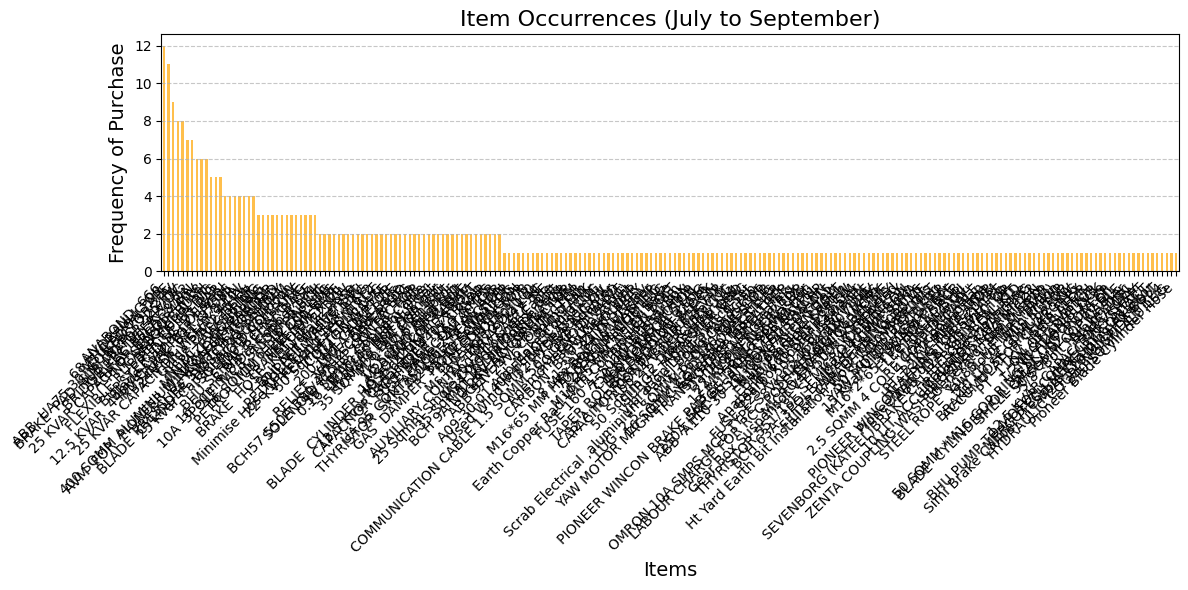

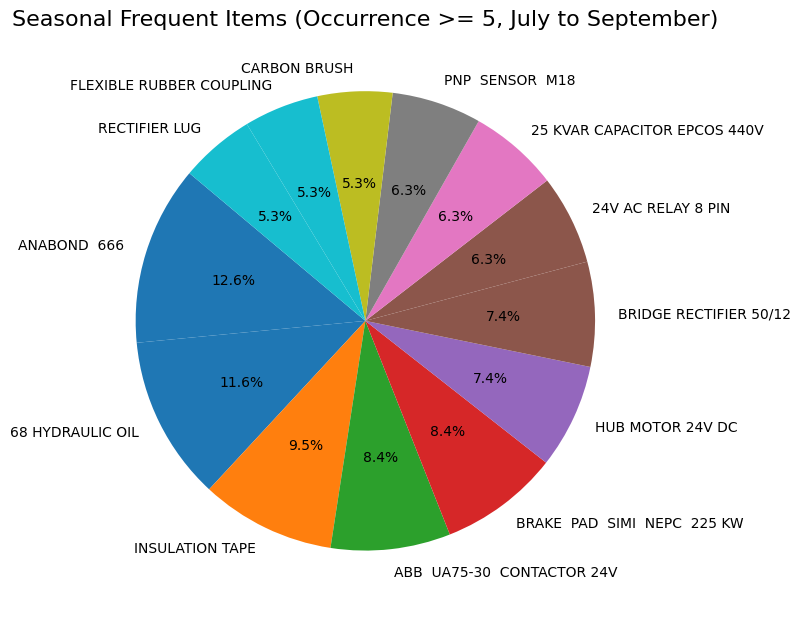

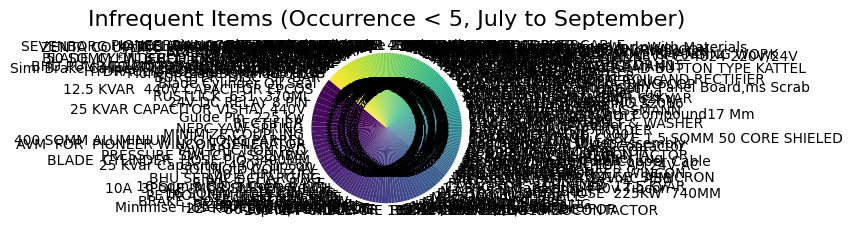

Insights (July to September):
- Total Items: 215
- Frequent Items (>= 5): 13
- Infrequent Items (< 5): 202


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Step 2: Filter Data for July to September
# Extract data for months July (7) to September (9) using 'Date' column
seasonal_data = df[(df['Date'].dt.month >= 7) & (df['Date'].dt.month <= 9)]

# Step 3: Count Item Occurrences in Seasonal Period
item_counts_seasonal = seasonal_data['Item Name'].value_counts()

# Step 4: Visualize All Items with Occurrence Frequency
plt.figure(figsize=(12, 6))

# Plot bar chart for all items in seasonal period
item_counts_seasonal.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Item Occurrences (July to September)", fontsize=16)
plt.xlabel("Items", fontsize=14)
plt.ylabel("Frequency of Purchase", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 5: Highlight Frequent Items (high-frequency)
threshold = 5  # Adjust threshold to define frequent items
frequent_items_seasonal = item_counts_seasonal[item_counts_seasonal >= threshold]

plt.figure(figsize=(8, 8))

# Plot pie chart for frequent items in seasonal period
frequent_items_seasonal.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10')
plt.title(f"Seasonal Frequent Items (Occurrence >= {threshold}, July to September)", fontsize=16)
plt.ylabel("")  # Remove y-axis label for a cleaner pie chart
plt.tight_layout()
plt.show()

# Step 6: Highlight Infrequent Items (low-frequency)
infrequent_items_seasonal = item_counts_seasonal[item_counts_seasonal < threshold]

plt.figure(figsize=(8, 8))

# Plot pie chart for infrequent items in seasonal period
infrequent_items_seasonal.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title(f"Infrequent Items (Occurrence < {threshold}, July to September)", fontsize=16)
plt.ylabel("")  # Remove y-axis label for a cleaner pie chart
plt.tight_layout()
plt.show()

# Step 7: Insights Summary for Seasonal Period
print("Insights (July to September):")
print(f"- Total Items: {len(item_counts_seasonal)}")
print(f"- Frequent Items (>= {threshold}): {len(frequent_items_seasonal)}")
print(f"- Infrequent Items (< {threshold}): {len(infrequent_items_seasonal)}")


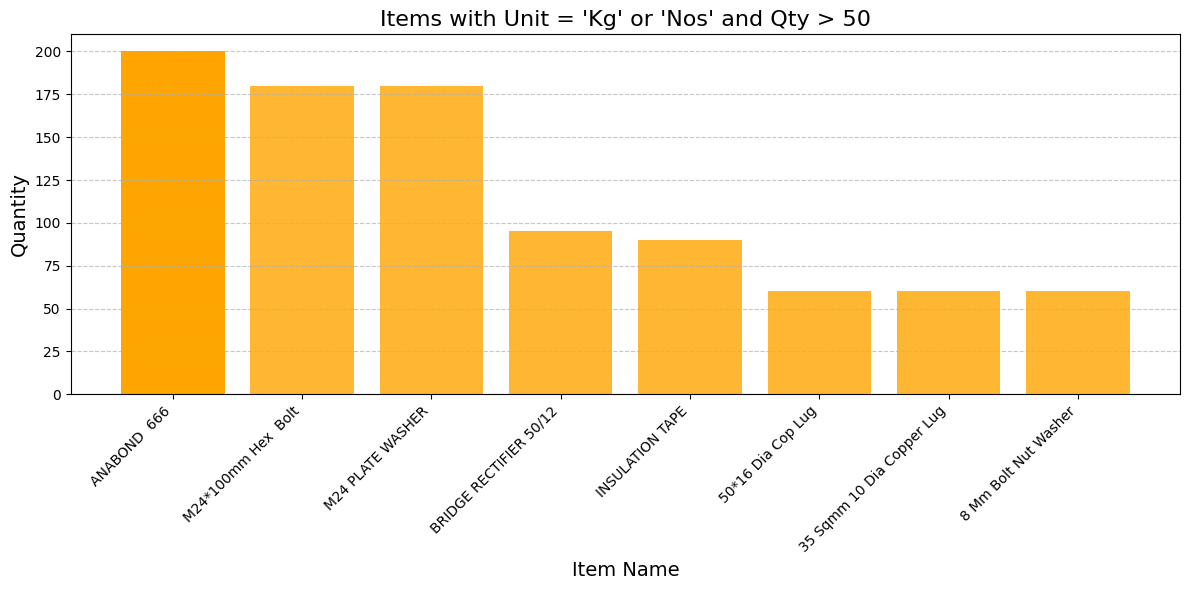

Filtered and sorted data (Qty > 50):
                      Item Name Unit Name    Qty
154                ANABOND  666       Nos  200.0
278                ANABOND  666       Nos  200.0
720                ANABOND  666       Nos  200.0
427         M24*100mm Hex  Bolt       Nos  180.0
627            M24 PLATE WASHER       Nos  180.0
344      BRIDGE RECTIFIER 50/12       Nos   95.0
407             INSULATION TAPE       Nos   90.0
756           50*16 Dia Cop Lug       Nos   60.0
1245  35 Sqmm 10 Dia Copper Lug       Nos   60.0
1262       8 Mm Bolt Nut Washer       Nos   60.0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Step 2: Filter Items Where Unit is 'Kg' or 'Nos'
filtered_data = df[df['Unit Name'].isin(['Kg', 'Nos'])]

# Step 3: Apply Threshold for Qty > 50
thresholded_data = filtered_data[filtered_data['Qty'] > 50]

# Step 4: Sort by Qty in Descending Order
sorted_data = thresholded_data.sort_values(by='Qty', ascending=False)

# Step 5: Visualization
plt.figure(figsize=(12, 6))

# Plot bar chart with 'Item Name' as x-axis and 'Qty' as y-axis
plt.bar(sorted_data['Item Name'], sorted_data['Qty'], color='orange', alpha=0.8)
plt.title("Items with Unit = 'Kg' or 'Nos' and Qty > 50", fontsize=16)
plt.xlabel("Item Name", fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 6: Insights
print(f"Filtered and sorted data (Qty > 50):\n{sorted_data[['Item Name', 'Unit Name', 'Qty']]}")



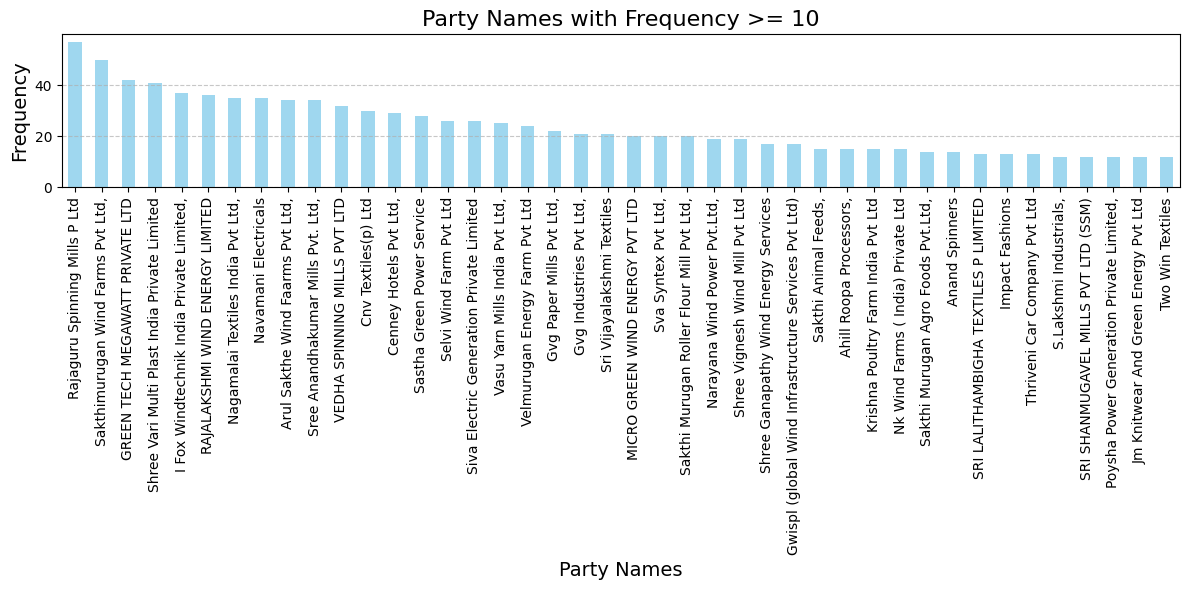

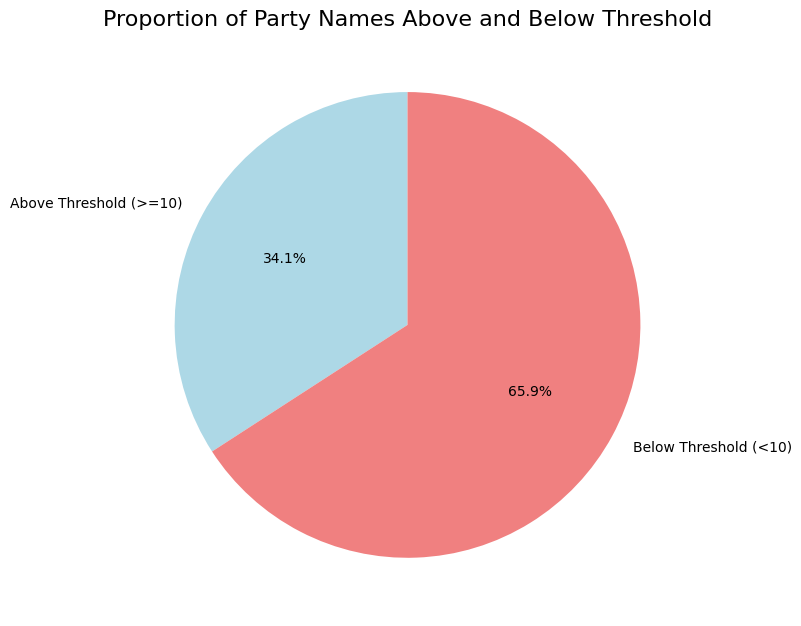

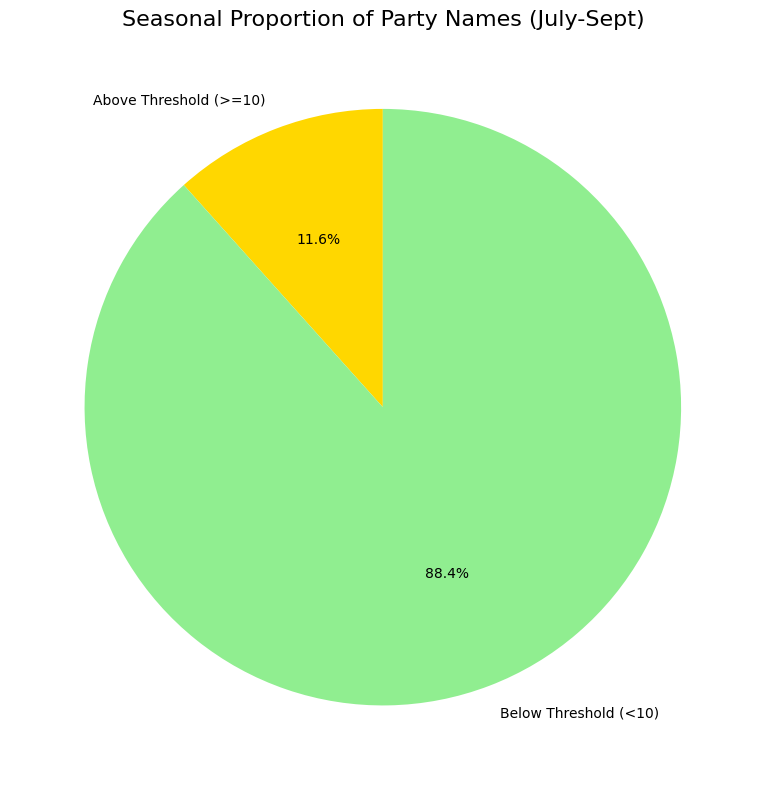

Overall Party Name Frequency (Above Threshold):
Party Name
Rajaguru Spinning Mills P Ltd                           57
Sakthimurugan Wind Farms Pvt Ltd,                       50
GREEN TECH MEGAWATT PRIVATE LTD                         42
Shree Vari Multi Plast India Private Limited            41
I Fox Windtechnik India Private Limited,                37
RAJALAKSHMI WIND ENERGY LIMITED                         36
Nagamalai Textiles India Pvt Ltd,                       35
Navamani Electricals                                    35
Arul Sakthe Wind Faarms Pvt Ltd,                        34
Sree Anandhakumar Mills Pvt. Ltd,                       34
VEDHA SPINNING MILLS PVT LTD                            32
Cnv Textiles(p) Ltd                                     30
Cenney Hotels Pvt Ltd,                                  29
Sastha Green Power Service                              28
Selvi Wind Farm Pvt Ltd                                 26
Siva Electric Generation Private Limited                

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Step 2: Frequency Distribution of Party Names
party_name_frequency = df['Party Name'].value_counts()

# Filter by Threshold
above_threshold = party_name_frequency[party_name_frequency >= 10]
below_threshold = party_name_frequency[party_name_frequency < 10]

# Step 3: Bar Chart for Party Names Above Threshold
plt.figure(figsize=(12, 6))
above_threshold.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Party Names with Frequency >= 10', fontsize=16)
plt.xlabel('Party Names', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 4: Proportion of Above vs Below Threshold
threshold_counts = pd.Series({
    'Above Threshold (>=10)': len(above_threshold),
    'Below Threshold (<10)': len(below_threshold)
})

# Pie Chart for Overall Distribution
plt.figure(figsize=(8, 8))
threshold_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Proportion of Party Names Above and Below Threshold', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Step 5: Seasonal Analysis (July to September)
# Filter data for July to September
seasonal_data = df[(df['Date'].dt.month >= 7) & (df['Date'].dt.month <= 9)]
seasonal_party_frequency = seasonal_data['Party Name'].value_counts()

# Separate Above and Below Threshold for Seasonal Data
seasonal_above_threshold = seasonal_party_frequency[seasonal_party_frequency >= 10]
seasonal_below_threshold = seasonal_party_frequency[seasonal_party_frequency < 10]

# Pie Chart for Seasonal Distribution
seasonal_counts = pd.Series({
    'Above Threshold (>=10)': len(seasonal_above_threshold),
    'Below Threshold (<10)': len(seasonal_below_threshold)
})

plt.figure(figsize=(8, 8))
seasonal_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightgreen'], startangle=90)
plt.title('Seasonal Proportion of Party Names (July-Sept)', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Optional Insights Print
print("Overall Party Name Frequency (Above Threshold):")
print(above_threshold)

print("\nSeasonal Party Name Frequency (Above Threshold, July-Sept):")
print(seasonal_above_threshold)


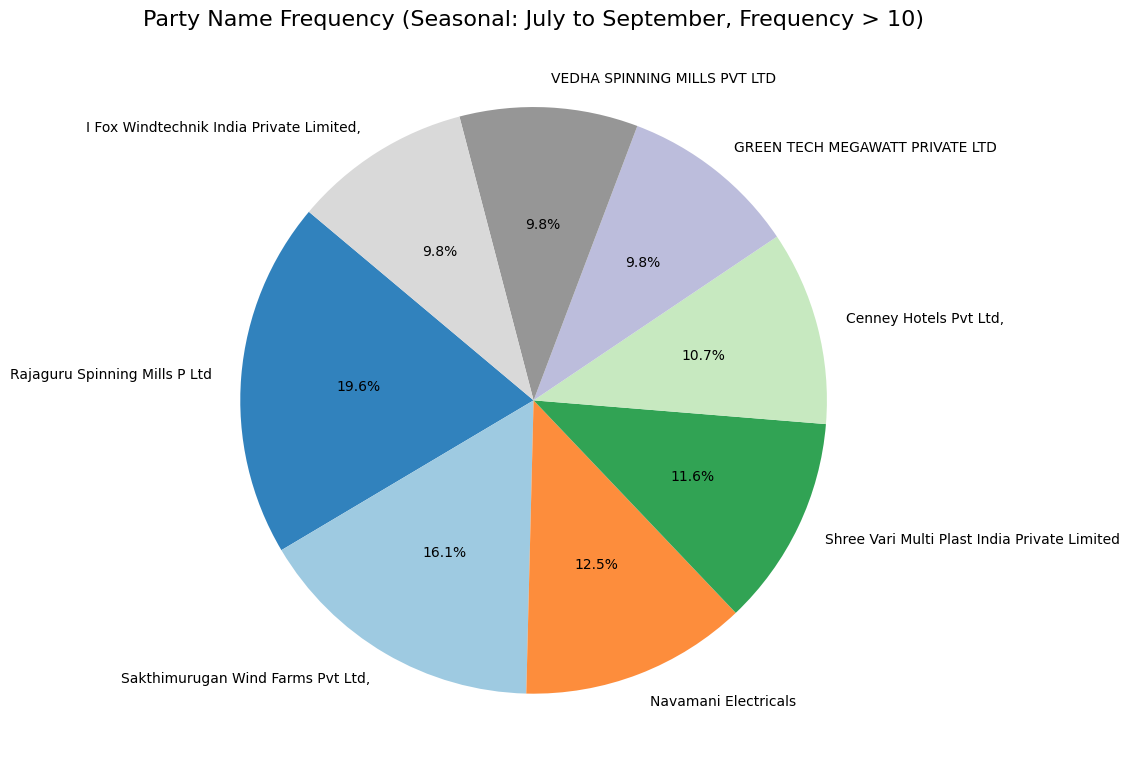

Party Name Frequency (Seasonal: July to September, with threshold applied):
Party Name
Rajaguru Spinning Mills P Ltd                   22
Sakthimurugan Wind Farms Pvt Ltd,               18
Navamani Electricals                            14
Shree Vari Multi Plast India Private Limited    13
Cenney Hotels Pvt Ltd,                          12
GREEN TECH MEGAWATT PRIVATE LTD                 11
VEDHA SPINNING MILLS PVT LTD                    11
I Fox Windtechnik India Private Limited,        11
Name: count, dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Step 2: Filter Data for Seasonal Months (July to September)
seasonal_data = df[(df['Date'].dt.month >= 7) & (df['Date'].dt.month <= 9)]

# Step 3: Calculate Party Name Frequency for Seasonal Data
seasonal_party_frequency = seasonal_data['Party Name'].value_counts()

# Step 4: Set a Frequency Threshold (e.g., only include Party Names with frequency > 10)
threshold = 10
filtered_party_frequency = seasonal_party_frequency[seasonal_party_frequency > threshold]

# Step 5: Plot Pie Chart for Party Name Frequency (Seasonal: July to September) with Threshold
plt.figure(figsize=(10, 8))
filtered_party_frequency.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20c')
plt.title(f'Party Name Frequency (Seasonal: July to September, Frequency > {threshold})', fontsize=16)
plt.ylabel('')  # Remove y-axis label for cleaner chart
plt.tight_layout()
plt.show()

# Step 6: Display Party Name Frequency in Seasonal Data (after Threshold)
print("Party Name Frequency (Seasonal: July to September, with threshold applied):")
print(filtered_party_frequency)


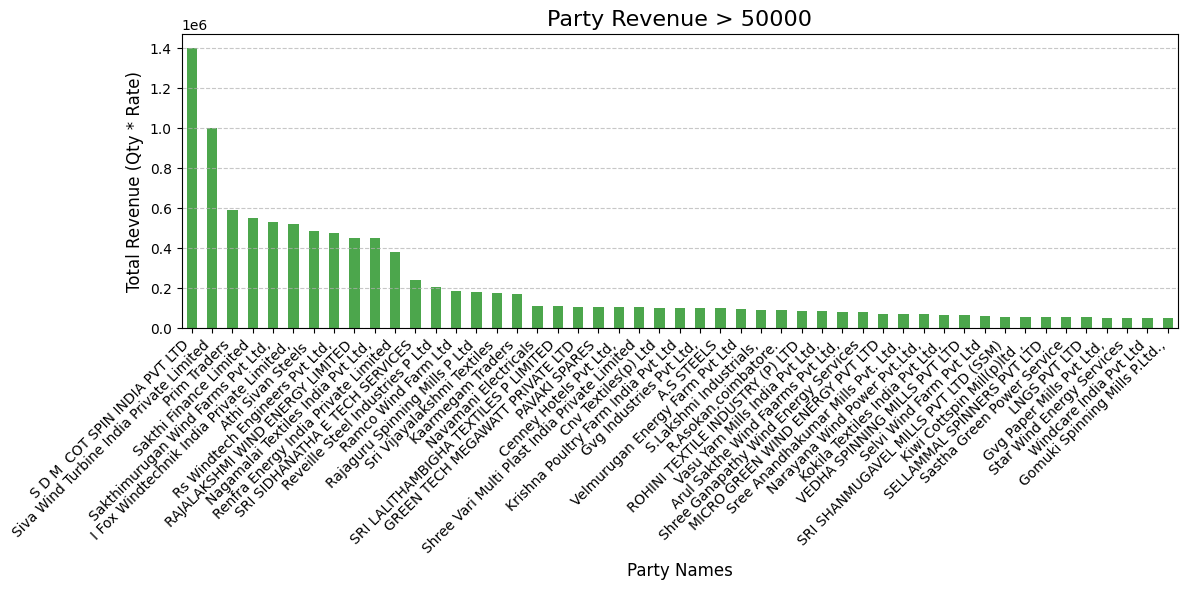

Insights:
- Total Parties: 123
- Parties with Revenue > 50000: 49
- Parties with Revenue <= 50000: 74

Filtered Party Revenue (Above Threshold):
Party Name
A.S STEELS                                       100000.0
Arul Sakthe Wind Faarms Pvt Ltd,                  80288.0
Athi Sivan Steels                                487880.0
Cenney Hotels Pvt Ltd,                           105462.0
Cnv Textiles(p) Ltd                              101356.0
GREEN TECH MEGAWATT PRIVATE LTD                  107927.0
Gomuki Spinning Mills P.Ltd.,                     51028.0
Gvg Industries Pvt Ltd,                          100072.0
Gvg Paper Mills Pvt Ltd,                          53290.0
I Fox Windtechnik India Private Limited,         522150.0
Kaarmegam Traders                                170000.0
Kiwi Cottspin Mill(p)ltd ,                        56075.0
Kokila Textiles India Pvt Ltd,                    68010.0
Krishna Poultry Farm India Pvt Ltd               100234.0
LNGS PVT LTD                    

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace 'Sales_cleaned.xlsx' with your actual dataset file path
df = pd.read_excel("Sales_cleaned.xlsx")

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Step 2: Calculate Revenue for Each Row
df['Revenue'] = df['Qty'] * df['Rate']

# Step 3: Aggregate Revenue by Party Name
party_revenue = df.groupby('Party Name')['Revenue'].sum()

# Step 4: Set a Revenue Threshold
threshold = 50000  # Adjust this threshold as needed
filtered_party_revenue = party_revenue[party_revenue > threshold]

# Step 5: Plot Bar Chart for Party Revenue (Above Threshold)
plt.figure(figsize=(12, 6))
filtered_party_revenue.sort_values(ascending=False).plot(kind='bar', color='green', alpha=0.7)
plt.title(f'Party Revenue > {threshold}', fontsize=16)
plt.xlabel('Party Names', fontsize=12)
plt.ylabel('Total Revenue (Qty * Rate)', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 6: Insights Summary
print("Insights:")
print(f"- Total Parties: {len(party_revenue)}")
print(f"- Parties with Revenue > {threshold}: {len(filtered_party_revenue)}")
print(f"- Parties with Revenue <= {threshold}: {len(party_revenue) - len(filtered_party_revenue)}")

# Optional: Display the Filtered Party Revenue
print("\nFiltered Party Revenue (Above Threshold):")
print(filtered_party_revenue)
